In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [4]:
df1=pd.read_excel('/Users/lukin/Downloads/om100648v_si_002 (1).xls')
df=df1.drop(columns=['No.', 'PC1', 'PC2','PC3', 'PC4'])



In [3]:
from sklearn.preprocessing import StandardScaler
df=df.rename(index=str, columns={"S4'": "S4"})
steric = ['He8_steric', '<(H3P)Pt(PH3)', 'S4']
# Separating out the features
x = df.loc[:, steric].values

y=df[steric].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
dfx=pd.DataFrame(x)

In [5]:
dfx

,0,1,2
0,-0.912518,1.263172,2.241859
1,-0.843231,0.124587,0.170313
2,-0.843231,1.023469,1.134523
3,0.904760,-0.414743,-0.635707
4,-0.546291,0.064661,0.140181
5,-0.158288,0.484140,0.207977
6,-0.401779,0.603991,0.094984
7,0.009979,2.102129,-0.771299
8,-0.536393,0.004735,0.155247
9,0.065408,-0.354818,-0.658306


In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

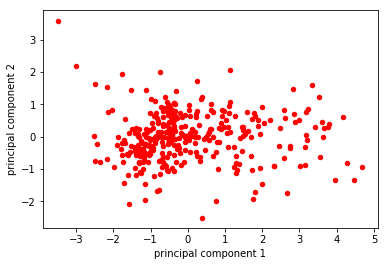

In [7]:
principalDf.plot(kind='scatter',x='principal component 1',y='principal component 2',color='red')
plt.show()

In [8]:
x1 = df.values
x1 = StandardScaler().fit_transform(x1)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x1)
principalDf1 = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

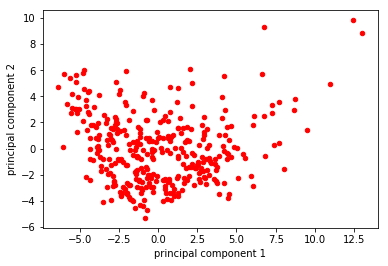

In [9]:
principalDf1.plot(kind='scatter',x='principal component 1',y='principal component 2',color='red')
plt.show()

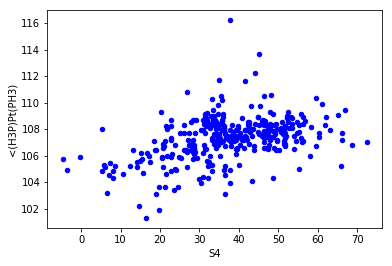

In [10]:
df.plot(kind='scatter',x='S4',y='<(H3P)Pt(PH3)',color='blue')
plt.show()

a=df['S4'].corr(df['He8_steric'])
a**2

In [11]:
a=df['S4'].corr(df['He8_steric']) 
a**2

0.4011020772467279

In [12]:
from scipy import stats
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
X = pd.DataFrame(df['S4'])
y = pd.DataFrame(df['<(H3P)Pt(PH3)'])
model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
 model.fit(X.iloc[train,:], y.iloc[train,:])
 score = model.score(X.iloc[test,:], y.iloc[test,:])
 scores.append(score)
print(scores)

[0.1243811675884383, 0.25849776599321617, 0.12972797412899018]


In [13]:
principalDf1.insert(1, 'Type', 'other type')
i = 159
while i <= 180:
    principalDf1['Type'].iloc[i]='dialkylbiaryl'
    i=i+1
principalDf1

/Users/lukin/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,principal component 1,Type,principal component 2
0,3.082698,other type,-0.798614
1,-1.604334,other type,-3.982233
2,7.236223,other type,3.306827
3,6.725021,other type,9.304958
4,-2.283536,other type,-3.412734
5,6.598666,other type,5.694601
6,2.820298,other type,-0.660143
7,2.015274,other type,6.076505
8,-2.366613,other type,-3.638691
9,-3.218706,other type,-1.971625


In [14]:
principalDf.insert(1, 'Type', 'other type')
i = 159
while i <= 180:
    principalDf['Type'].iloc[i]='dialkylbiaryl'
    i=i+1
principalDf1

/Users/lukin/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,principal component 1,Type,principal component 2
0,3.082698,other type,-0.798614
1,-1.604334,other type,-3.982233
2,7.236223,other type,3.306827
3,6.725021,other type,9.304958
4,-2.283536,other type,-3.412734
5,6.598666,other type,5.694601
6,2.820298,other type,-0.660143
7,2.015274,other type,6.076505
8,-2.366613,other type,-3.638691
9,-3.218706,other type,-1.971625


In [15]:
df.insert(1, 'Type', 'other type')
i = 159
while i <= 180:
    df['Type'].iloc[i]='dialkylbiaryl'
    i=i+1
df

/Users/lukin/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,E(HOMO),Type,E(LUMO),He8_steric,PA,Q(B),BE(B),P-B,DP-A(B),DA-P-A(B),...,P-Pd,DP-A(Pd),DA-P-A(Pd),Q(Pt),BE(Pt),P-Pt,DP-A(Pt),DA-P-A(Pt),<(H3P)Pt(PH3),S4
0,-0.24636,other type,-0.00029,2.300000,190.600000,-0.59000,26.100000,1.9410,-0.0130,6.30,...,2.244,-0.008,5.400,-0.01400,8.80,2.328,-0.0010,1.50,109.40,66.9
1,-0.19045,other type,0.03268,3.000000,233.000000,-0.68000,39.200000,1.9260,-0.0280,4.60,...,2.268,-0.021,3.400,-0.06100,12.90,2.331,-0.0100,1.30,107.50,39.4
2,-0.27742,other type,-0.05837,3.000000,182.300000,-0.56000,26.300000,1.9150,-0.0020,3.40,...,2.244,0.023,-0.300,0.13700,22.80,2.250,0.0080,-0.10,109.00,52.2
3,-0.26620,other type,-0.11270,20.660000,194.040000,-0.53820,22.510000,1.9240,-0.0050,2.10,...,2.318,0.045,-1.600,0.26880,16.58,2.260,0.0460,-2.40,106.60,28.7
4,-0.18723,other type,0.02584,6.000000,239.100000,-0.68000,39.000000,1.9340,-0.0270,4.80,...,2.289,-0.013,2.500,-0.06500,17.10,2.338,-0.0100,1.60,107.40,39.0
5,-0.27210,other type,-0.07070,9.920000,188.820000,-0.55510,24.350000,1.9240,0.0030,2.70,...,2.269,0.030,-1.900,0.15390,20.39,2.263,0.0210,-1.30,108.10,39.9
6,-0.23430,other type,-0.01640,7.460000,211.790000,-0.61780,32.020000,1.9230,-0.0240,3.40,...,2.266,-0.015,3.200,0.03510,16.55,2.303,0.0000,-0.30,108.30,38.4
7,-0.21290,other type,-0.08380,11.620000,206.820000,-0.58720,25.070000,1.9760,0.0110,0.70,...,2.281,0.024,-5.500,0.08390,13.95,2.351,-0.0040,1.10,110.80,26.9
8,-0.18767,other type,0.02530,6.100000,241.900000,-0.68000,39.200000,1.9340,-0.0290,5.10,...,2.288,-0.014,2.500,-0.06300,16.60,2.342,-0.0120,1.90,107.30,39.2
9,-0.17950,other type,0.02410,12.180000,244.600000,-0.69000,38.600000,1.9410,-0.0240,4.00,...,2.317,-0.014,2.400,-0.05600,14.40,2.367,-0.0010,0.10,106.70,28.4


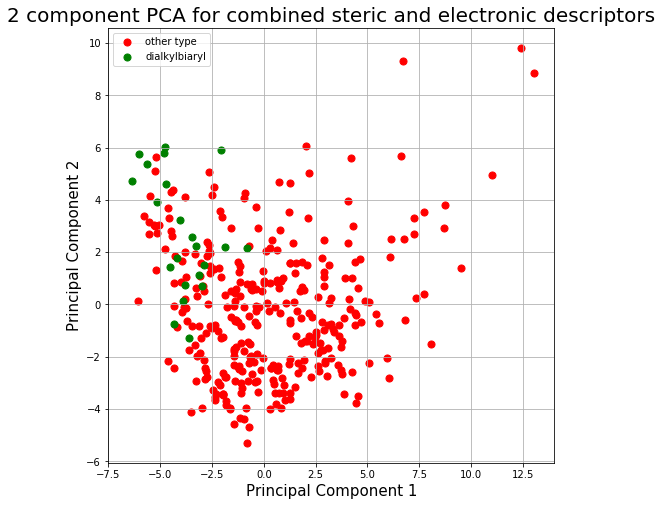

In [16]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA for combined steric and electronic descriptors', fontsize = 20)
targets = ['other type', 'dialkylbiaryl']
colors = ['r', 'g']
for Type, color in zip(targets, colors):
    indicesToKeep = principalDf1['Type'] == Type
    ax.scatter(principalDf1.loc[indicesToKeep, 'principal component 1']
               , principalDf1.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

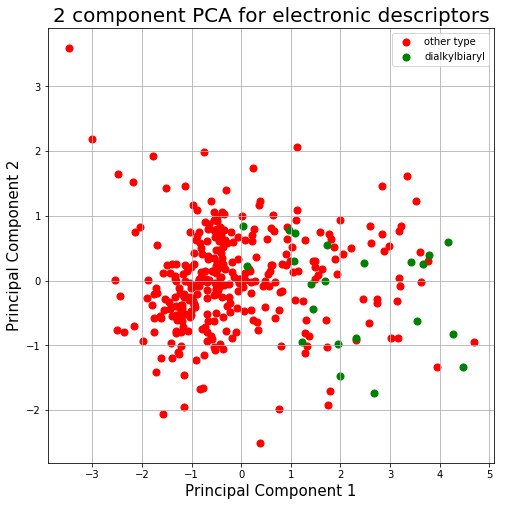

In [17]:


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA for electronic descriptors', fontsize = 20)
targets = ['other type', 'dialkylbiaryl']
colors = ['r', 'g']
for Type, color in zip(targets,colors):
    indicesToKeep = principalDf['Type'] == Type
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

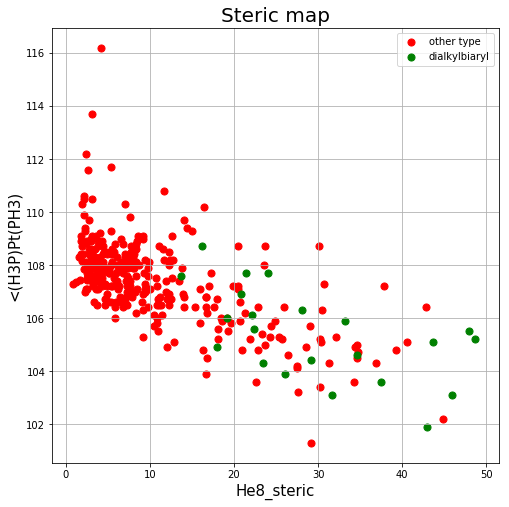

In [18]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('He8_steric', fontsize = 15)
ax.set_ylabel('<(H3P)Pt(PH3)', fontsize = 15)
ax.set_title('Steric map', fontsize = 20)
targets = ['other type', 'dialkylbiaryl']
colors = ['r', 'g']
for Type, color in zip(targets,colors):
    indicesToKeep = df['Type'] == Type
    ax.scatter(df.loc[indicesToKeep, 'He8_steric']
               , df.loc[indicesToKeep, '<(H3P)Pt(PH3)']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

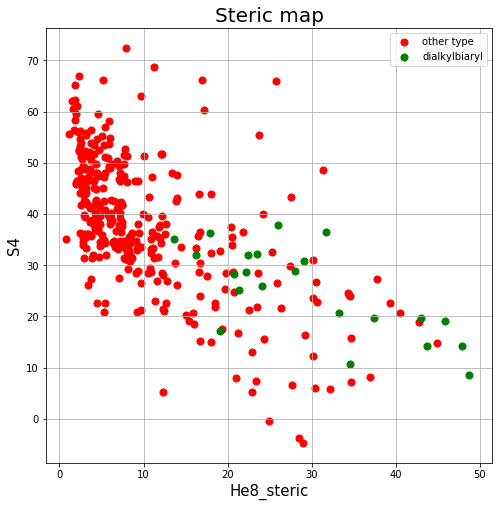

In [19]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('He8_steric', fontsize = 15)
ax.set_ylabel('S4', fontsize = 15)
ax.set_title('Steric map', fontsize = 20)
targets = ['other type', 'dialkylbiaryl']
colors = ['r', 'g']
for Type, color in zip(targets,colors):
    indicesToKeep = df['Type'] == Type
    ax.scatter(df.loc[indicesToKeep, 'He8_steric']
               , df.loc[indicesToKeep, 'S4']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

/Users/lukin/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


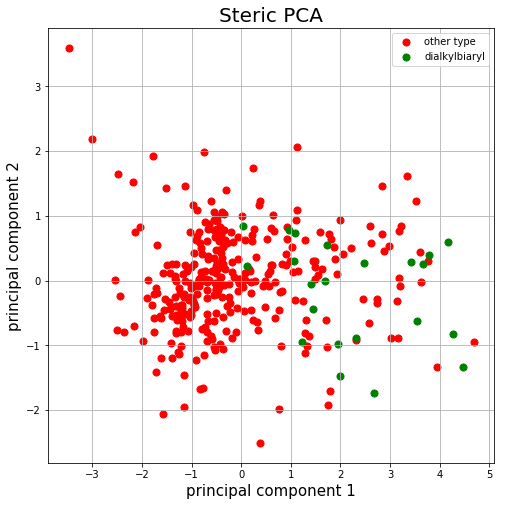

In [20]:
ster=df[steric]
ster = StandardScaler().fit_transform(ster)
ster=pd.DataFrame(ster)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(ster)
principalster = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalster.insert(1, 'Type', 'other type')
i = 159
while i <= 180:
    principalster['Type'].iloc[i]='dialkylbiaryl'
    i=i+1

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('principal component 1', fontsize = 15)
ax.set_ylabel('principal component 2', fontsize = 15)
ax.set_title('Steric PCA', fontsize = 20)
targets = ['other type', 'dialkylbiaryl']
colors = ['r', 'g']
for Type, color in zip(targets,colors):
    indicesToKeep = principalster['Type'] == Type
    ax.scatter(principalster.loc[indicesToKeep, 'principal component 1']
               , principalster.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


In [23]:
df1.columns

Index(['No.', 'E(HOMO)', 'E(LUMO)', 'He8_steric', 'PA', 'Q(B)', 'BE(B)', 'P-B',
       'DP-A(B)', 'DA-P-A(B)', 'Q(Au)', 'BE(Au)', 'Au-Cl', 'Au-P', 'DP-A(Au)',
       'DA-P-A(Au)', 'Q(Pd)', 'BE(Pd)', 'Pd-Cl trans', 'P-Pd', 'DP-A(Pd)',
       'DA-P-A(Pd)', 'Q(Pt)', 'BE(Pt)', 'P-Pt', 'DP-A(Pt)', 'DA-P-A(Pt)',
       '<(H3P)Pt(PH3)', 'S4'', 'PC1', 'PC2', 'PC3', 'PC4'],
      dtype='object')